# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [87]:
df = pd.read_csv("data/grades.csv")
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [63]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [64]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [65]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

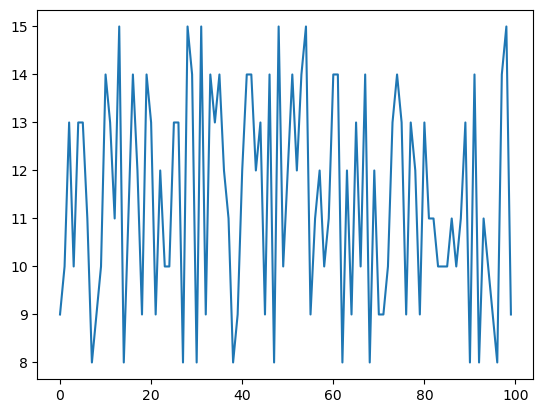

In [66]:
df['國文'].plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: ylabel='Frequency'>

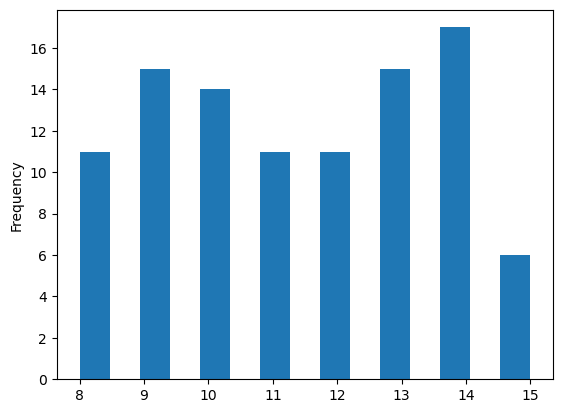

In [67]:
df['國文'].plot.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [68]:
df['國文'].mean()

11.39

算標準差。

In [69]:
df['國文'].std()

2.1968526614594834

不如就該算的都幫我們算算...

In [70]:
df['國文'].describe()

count    100.000000
mean      11.390000
std        2.196853
min        8.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       15.000000
Name: 國文, dtype: float64

有時我們很愛看的相關係數矩陣。

In [71]:
df.corr(numeric_only=True)

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [72]:
df['數學'].corr(df['國文'])

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [88]:
df['總級分'] = df.sum(axis=1)
df

/var/folders/ld/65l4lwhx7tgdtnnbsltrl__40000gp/T/ipykernel_16540/974237467.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['總級分'] = df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

In [74]:
df

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


In [89]:
df['加權'] = df['國文'] + df['英文'] + 2 * df['自然']
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,39
1,胡玉華,10,10,10,8,9,47,36
2,黃淑婷,13,15,8,11,14,61,50
3,陳上紫,10,10,8,9,14,51,38
4,崔靜成,13,12,14,12,13,64,49
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,45
96,吳筱婷,8,10,14,10,15,57,38
97,陳家銘,14,9,11,8,12,54,39
98,李明威,15,9,8,9,15,56,42


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [76]:
df.sort_values('總級分')

,姓名,國文,英文,數學,自然,社會,總級分,加權
18,梁慧君,9,8,8,8,12,45,33
7,林金鳳,8,9,10,10,8,45,37
1,胡玉華,10,10,10,8,9,47,36
32,林建亨,9,11,8,8,11,47,36
93,李曼夢,11,9,11,8,8,47,36
...,...,...,...,...,...,...,...,...
64,俞志峰,9,14,13,14,15,65,51
54,陳怡潔,15,15,9,15,11,65,60
57,胡淳茜,12,15,14,13,11,65,53
12,李正偉,11,15,11,14,15,66,54


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [91]:
df2 = df.sort_values(by=['加權', '總級分'], ascending=False)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
54,陳怡潔,15,15,9,15,11,65,60
82,蕭呈萍,11,14,9,15,9,58,55
12,李正偉,11,15,11,14,15,66,54
80,施雅鈴,13,15,12,13,13,66,54
89,郭順誠,13,13,10,14,9,59,54
...,...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47,36
71,葉必盈,9,8,13,9,12,51,35
72,陳欣玲,10,9,13,8,10,50,35
30,連瑋玲,8,10,14,8,13,53,34


### 【重點】重設 index

In [81]:
df2.index = range(1, 101)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,陳怡潔,15,15,9,15,11,65,60
2,蕭呈萍,11,14,9,15,9,58,55
3,李正偉,11,15,11,14,15,66,54
4,施雅鈴,13,15,12,13,13,66,54
5,郭順誠,13,13,10,14,9,59,54
...,...,...,...,...,...,...,...,...
96,李曼夢,11,9,11,8,8,47,36
97,葉必盈,9,8,13,9,12,51,35
98,陳欣玲,10,9,13,8,10,50,35
99,連瑋玲,8,10,14,8,13,53,34


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [82]:
df2[df2['數學'] == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
17,李士賢,10,14,15,13,13,65,50
25,曾怡君,11,12,15,13,14,65,49
35,周育霖,9,12,15,13,12,61,47
45,詹威德,12,13,15,10,14,64,45
49,張雅彬,10,11,15,12,8,56,45
53,吳志遠,13,15,15,8,8,59,44
59,林哲法,14,9,15,10,14,62,43
67,陳竹伯,10,12,15,10,14,61,42
73,段冠廷,9,8,15,12,15,59,41
77,芮秋辛,11,10,15,10,8,54,41


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [83]:
df2[(df2['數學'] == 15) & (df2['英文'] == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
53,吳志遠,13,15,15,8,8,59,44


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [84]:
df2 = df2.drop('總級分', axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,陳怡潔,15,15,9,15,11,60
2,蕭呈萍,11,14,9,15,9,55
3,李正偉,11,15,11,14,15,54
4,施雅鈴,13,15,12,13,13,54
5,郭順誠,13,13,10,14,9,54
...,...,...,...,...,...,...,...
96,李曼夢,11,9,11,8,8,36
97,葉必盈,9,8,13,9,12,35
98,陳欣玲,10,9,13,8,10,35
99,連瑋玲,8,10,14,8,13,34


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [92]:
df2.drop('總級分', axis=1, inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
54,陳怡潔,15,15,9,15,11,60
82,蕭呈萍,11,14,9,15,9,55
12,李正偉,11,15,11,14,15,54
80,施雅鈴,13,15,12,13,13,54
89,郭順誠,13,13,10,14,9,54
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,36
71,葉必盈,9,8,13,9,12,35
72,陳欣玲,10,9,13,8,10,35
30,連瑋玲,8,10,14,8,13,34


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [94]:
df2.drop(1)

,姓名,國文,英文,數學,自然,社會,加權
54,陳怡潔,15,15,9,15,11,60
82,蕭呈萍,11,14,9,15,9,55
12,李正偉,11,15,11,14,15,54
80,施雅鈴,13,15,12,13,13,54
89,郭順誠,13,13,10,14,9,54
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,36
71,葉必盈,9,8,13,9,12,35
72,陳欣玲,10,9,13,8,10,35
30,連瑋玲,8,10,14,8,13,34


In [95]:
df2.drop([0,5])

,姓名,國文,英文,數學,自然,社會,加權
54,陳怡潔,15,15,9,15,11,60
82,蕭呈萍,11,14,9,15,9,55
12,李正偉,11,15,11,14,15,54
80,施雅鈴,13,15,12,13,13,54
89,郭順誠,13,13,10,14,9,54
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,36
71,葉必盈,9,8,13,9,12,35
72,陳欣玲,10,9,13,8,10,35
30,連瑋玲,8,10,14,8,13,34


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [98]:
df2[df2['姓名'] == '吳志遠']

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,44


In [99]:
df2.drop(df2[df2['姓名'] == '吳志遠'].index)

,姓名,國文,英文,數學,自然,社會,加權
54,陳怡潔,15,15,9,15,11,60
82,蕭呈萍,11,14,9,15,9,55
12,李正偉,11,15,11,14,15,54
80,施雅鈴,13,15,12,13,13,54
89,郭順誠,13,13,10,14,9,54
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,36
71,葉必盈,9,8,13,9,12,35
72,陳欣玲,10,9,13,8,10,35
30,連瑋玲,8,10,14,8,13,34


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [52]:
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 960.5 kB/s eta 0:00:00a 0:00:01


In [100]:
# import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')

In [102]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 只要最後 300 個交易日!

In [109]:
# df.tail(300)
df[-300:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


<Axes: xlabel='Date'>

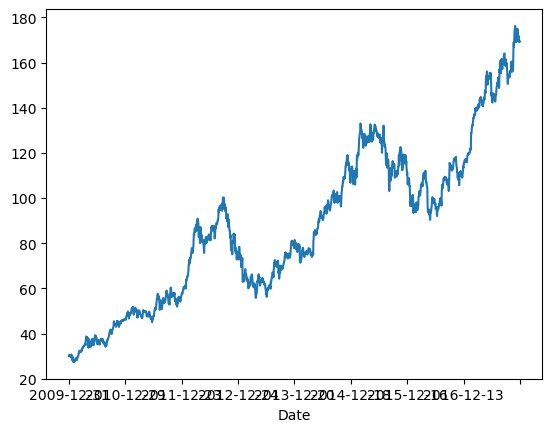

In [111]:
df['Close'].plot()

#### 20 日的移動平均

<Axes: xlabel='Date'>

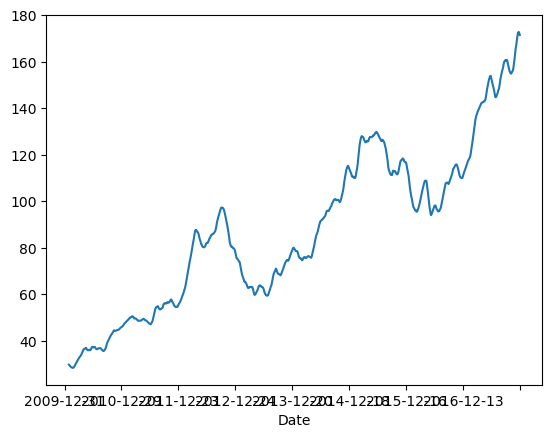

In [110]:
c_price_20 = df['Close'].rolling(20).mean()
c_price_20.plot()

<AxesSubplot:xlabel='Date'>

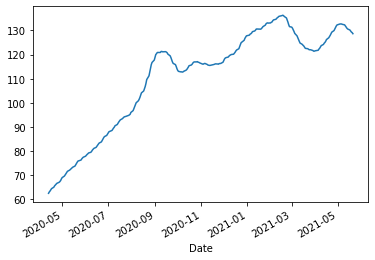

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

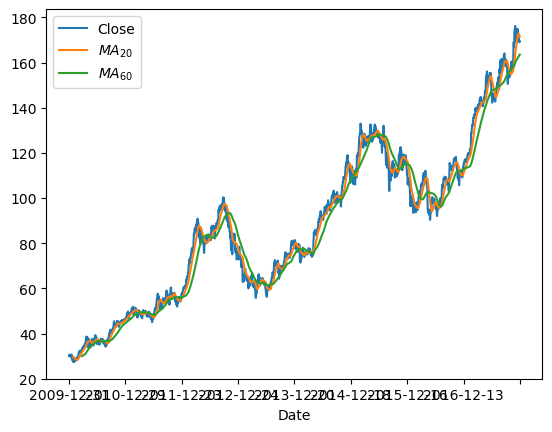

In [108]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [114]:
closes = df['Close'].values
len(closes)

2000

In [115]:
x = closes[:-1]
len(x)

1999

In [117]:
y = closes[1:]
len(y)

1999

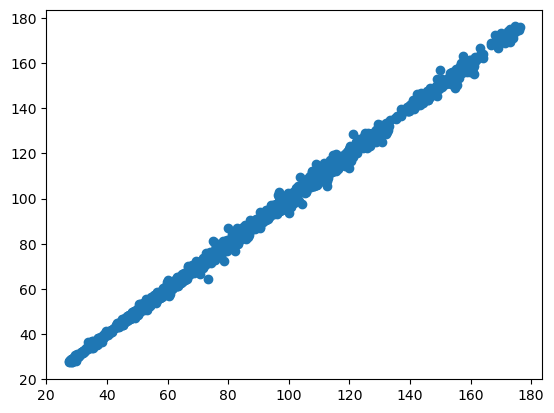

In [119]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [121]:
mydata = np.random.randn(4,3)

array([[-2.55231259,  1.90682379, -0.20156659],
       [ 1.01709617, -0.03222475, -0.37933992],
       [-0.25137135,  1.02654615,  2.26766347],
       [-0.06883999, -0.61168607,  0.17414026]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [124]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [125]:
df2

,A,B,C
0,2.069706,1.166903,1.534483
1,0.291185,0.550485,0.019689
2,-2.270745,-1.481795,1.239856
3,-1.729827,0.361615,-0.007885


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [127]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [128]:
df3

,A,B,C
0,1.133726,0.659363,0.596678
1,0.485589,1.006402,-0.323686
2,0.785864,0.098008,0.950527


In [143]:
df4 = pd.concat([df2, df3])

In [134]:
df4

,A,B,C
0,2.069706,1.166903,1.534483
1,0.291185,0.550485,0.019689
2,-2.270745,-1.481795,1.239856
3,-1.729827,0.361615,-0.007885
0,1.133726,0.659363,0.596678
1,0.485589,1.006402,-0.323686
2,0.785864,0.098008,0.950527


前面我們弄得亂七八糟的 index 重設一下。

In [138]:
df4.index = range(7)

In [139]:
df4

,A,B,C
0,2.069706,1.166903,1.534483
1,0.291185,0.550485,0.019689
2,-2.270745,-1.481795,1.239856
3,-1.729827,0.361615,-0.007885
4,1.133726,0.659363,0.596678
5,0.485589,1.006402,-0.323686
6,0.785864,0.098008,0.950527


#### 横向的貼

In [144]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [145]:
df5

,A,B,C,A,B,C
0,2.069706,1.166903,1.534483,1.133726,0.659363,0.596678
1,0.291185,0.550485,0.019689,0.485589,1.006402,-0.323686
2,-2.270745,-1.481795,1.239856,0.785864,0.098008,0.950527
3,-1.729827,0.361615,-0.007885,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [146]:
df6 = pd.read_csv('data/names.csv')

In [147]:
df6

,羅雅慧
0,王紹尹
1,黃季坤
2,許正書
3,張鈞蓮
4,陳緯陽
...,...
94,陳君生
95,曾桂甫
96,林欣怡
97,林佳霖


In [161]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [162]:
df_grades

,國文,英文,數學,社會,自然
0,15,13,6,14,11
1,6,9,11,14,10
2,6,6,14,11,7
3,8,13,14,6,6
4,12,14,9,6,15
...,...,...,...,...,...
95,8,8,6,8,10
96,13,11,13,7,6
97,12,6,11,9,11
98,11,6,11,11,13


In [163]:
df_grades.to_csv("data/grades.csv", index=0)

In [164]:
df_grades = pd.read_csv("data/grades.csv")
df_grades

,國文,英文,數學,社會,自然
0,15,13,6,14,11
1,6,9,11,14,10
2,6,6,14,11,7
3,8,13,14,6,6
4,12,14,9,6,15
...,...,...,...,...,...
95,8,8,6,8,10
96,13,11,13,7,6
97,12,6,11,9,11
98,11,6,11,11,13


In [165]:
pd.concat([df6, df_grades], axis=1)

,羅雅慧,國文,英文,數學,社會,自然
0,王紹尹,15,13,6,14,11
1,黃季坤,6,9,11,14,10
2,許正書,6,6,14,11,7
3,張鈞蓮,8,13,14,6,6
4,陳緯陽,12,14,9,6,15
...,...,...,...,...,...,...
95,曾桂甫,8,8,6,8,10
96,林欣怡,13,11,13,7,6
97,林佳霖,12,6,11,9,11
98,胡筱芸,11,6,11,11,13


,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10
